## Data generation

In [5]:
# install scikit-learn, tensorflow, pandas, matplotlib, numpy

'conda' 不是內部或外部命令、可執行的程式或批次檔。


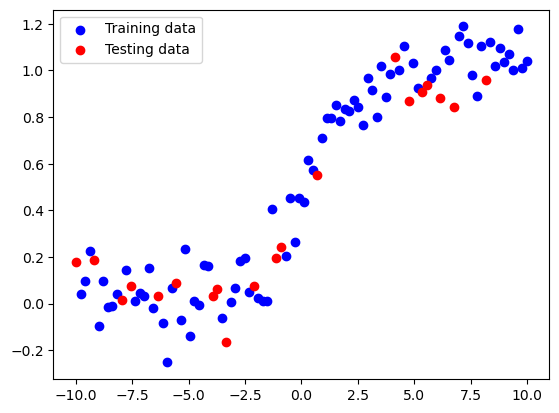

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# randomseed
np.random.seed(0)

# data : y = ax+b
a = 2
b = 1
noise_scale = 0.1

# data generation
# x = np.linspace(0, 50, 100)
# q = np.random.normal(0, noise_scale, x.shape)
# y = a * x + b + q

# # data : y = a*exp(bx)
# a = 2
# b = 1
# c= 50
# noise_scale = 20

x = np.linspace(-10, 10, 100)
q = np.random.normal(0, noise_scale, x.shape)
y = 1 / (1 + np.exp(-x))+q
y_binary = np.where(y > 0.5, 1, 0)
# # data generation
# x = np.linspace(0, 5, 100)
# y = a * np.exp(b * x) + q + c

from sklearn.preprocessing import StandardScaler

# 创建 StandardScaler 对象
# scaler = StandardScaler()

# # # 对数据集进行标准化
# x_nor = scaler.fit_transform(x.reshape(-1, 1))
# print(x_nor)
# x_normalized = x_nor.reshape(-1, 1)
# print(x_normalized)

# splitting dataset to training set and testing set 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# x_train, x_test, y_train, y_test = train_test_split(x_nor, y_binary, test_size=0.2, random_state=42)

#  data visualization
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='red', label='Testing data')
plt.legend()
plt.show()


## Build ANN model

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# model = Sequential([
#     Dense(1, input_shape=(1,), activation='linear')
# ])

model = Sequential([
    Dense(5, input_shape=(1,), activation='relu'),
    Dense(3, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Sequential.help
# 编译模型
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy')


## Training ANN model

In [37]:
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# 训练模型
# history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stop])

history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=20)

# history = model.fit(x_train, y_train, validation_split=0.2, epochs=1000, batch_size=20, callbacks=[early_stop])

Epoch 1/1000
4/4 [==============================] - 2s 186ms/step - loss: 0.3871 - val_loss: 0.2678
Epoch 2/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.3629 - val_loss: 0.2386
Epoch 3/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.3439 - val_loss: 0.2125
Epoch 4/1000
4/4 [==============================] - 0s 29ms/step - loss: 0.3257 - val_loss: 0.1947
Epoch 5/1000
4/4 [==============================] - 0s 24ms/step - loss: 0.3126 - val_loss: 0.1737
Epoch 6/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.2975 - val_loss: 0.1532
Epoch 7/1000
4/4 [==============================] - 0s 26ms/step - loss: 0.2861 - val_loss: 0.1325
Epoch 8/1000
4/4 [==============================] - 0s 30ms/step - loss: 0.2691 - val_loss: 0.1131
Epoch 9/1000
4/4 [==============================] - 0s 28ms/step - loss: 0.2555 - val_loss: 0.0884
Epoch 10/1000
4/4 [==============================] - 0s 31ms/step - loss: 0.2423 - val_loss: 0.0622
Epoch 11

## Model evaluation

1/1 [==============================] - 0s 53ms/step - loss: 19661.0605


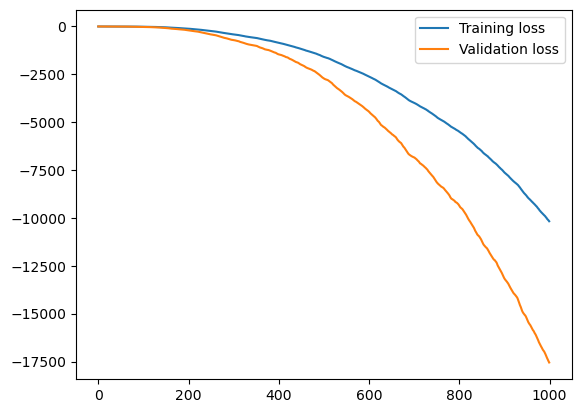

In [38]:
# 评估模型
model.evaluate(x_test, y_test)

# 绘制训练历史
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 186ms/step


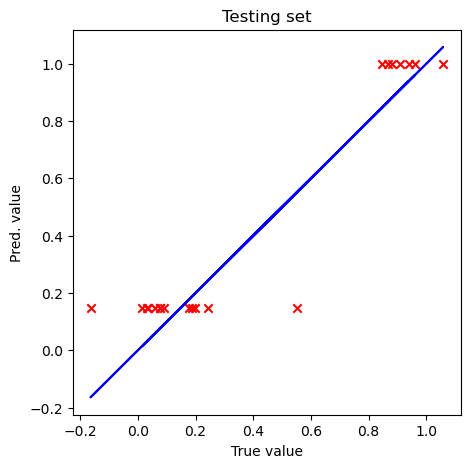

3/3 [==============================] - 0s 4ms/step


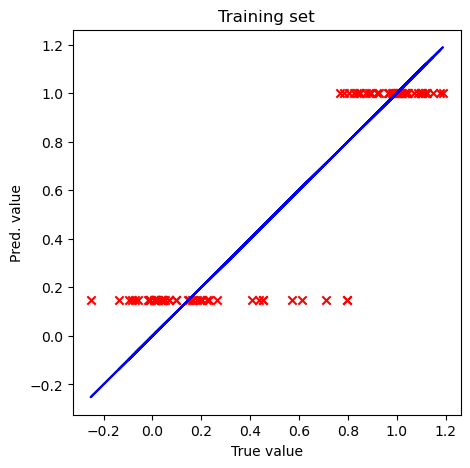

In [39]:
def plot_scatter (x, y, title, x_label, y_label,n):
    # plt.subplot(2, 2, n);
    plt.figure(figsize=(5, 5));
    plt.plot(x, x, color="blue", label="d")
    plt.scatter(x, y, marker="x", color="red")
    # plt.axis((0,210, 0,210))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

y_pred = model.predict(x_test)
plot_scatter(y_test, y_pred, "Testing set", "True value", "Pred. value",1)

y_pred = model.predict(x_train)
plot_scatter(y_train, y_pred, "Training set", "True value", "Pred. value",2)


3/3 [==============================] - 0s 5ms/step


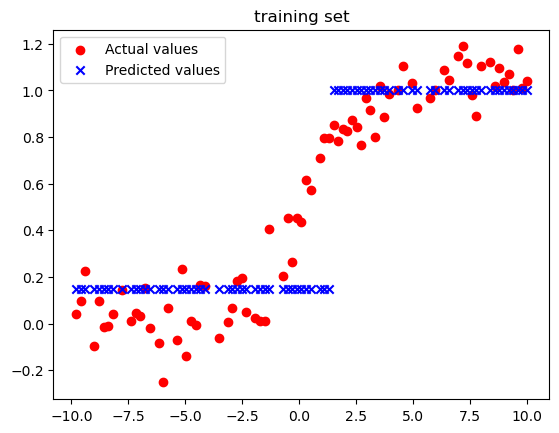

1/1 [==============================] - 0s 69ms/step


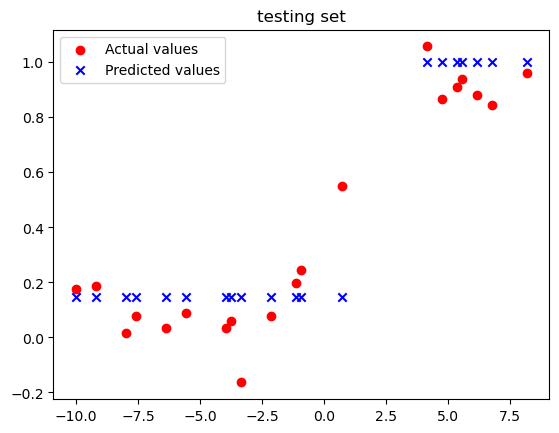

In [41]:
y_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color='red', label='Actual values')
plt.scatter(x_train, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('training set')
plt.legend()
plt.show()


# 使用模型进行预测
y_pred = model.predict(x_test)
# 可视化真实值与预测值
plt.scatter(x_test, y_test, color='red', label='Actual values')
plt.scatter(x_test, y_pred, color='blue', marker='x', label='Predicted values')
plt.title('testing set')
plt.legend()
plt.show()

### Exercise : Please try to write R2 and Pearson correlation function for evaluating the training model

## coefficient of determination, denoted R2
https://en.wikipedia.org/wiki/Coefficient_of_determination

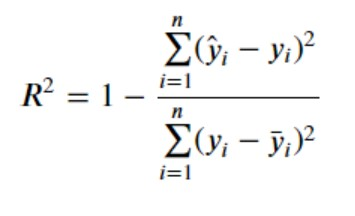


## Pearson correlation function
#### The Pearson correlation measures the strength of the linear relationship between two variables. It has a value between -1 to 1, with a value of -1 meaning a total negative linear correlation, 0 being no correlation, and + 1 meaning a total positive correlation.

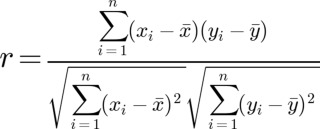

餘弦相似度的定義是兩個向量的點積除以這兩個向量模的乘積：

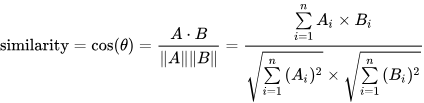
​